#Initialize

In [ ]:
%pip install aplpy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec #to make a grid of axes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes #to make inset
import aplpy #to work with fits
from astropy import units as u #to work with units
import numpy as np
import random

In [ ]:
#Import data files to use (don't worry about this :D)
from google.colab import files
uploaded = files.upload()

In [ ]:
# Helper functions
import scipy.constants as const

def random_array(min,max,l):
  '''Returns an array of random numbers between min and max, with length l.'''
  return np.array(random.sample(range(min, max), l))

def load_file(file_name):
  '''Load data in file_name and unpack the columns.'''
  data=np.loadtxt('/content/'+file_name) #loading file
  return data.T

def freq_to_wavel(f):
    '''Convert from frequency (f, in GHz) to wavelength (wl, in cm). '''
    return const.speed_of_light/(f*1E9)*100

def wavel_to_freq(wl):
    '''Convert from wavelength (wl, in cm) to frequency (f, in GHz). '''
    return const.speed_of_light/(wl/100)/1E9

def make_label_rms(rms):
    '''Make the label of the rms of the figure'''
    return f'rms = {rms} '+r'$\mu$Jy beam$^{-1}$'


# Basics

A **Figure** can contain several Axes. The **Axes** is were you actually make the plot.

In [ ]:
# Create some data
x = range(0,50)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x)-np.cos(x)

## Exercise 1
Create a **Figure** containing a single **axes**. Fill it with data.

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x,y1) # Plot the data
fig.show() # Show it

## Exercise 2
Create a **Figure** containing a two horizontal **axes** (top and bottom). Fill it with data.

In [ ]:
fig, axes = plt.subplots(2)  # Create a figure containing two horizontal axes (top and bottom).
axes[0].plot(x,y1) # Plot the data in the first axes (index 0) 
axes[1].plot(x,y2) #  Plot the data in the second axes (index 1)
fig.show() # Show it

## Exercise 3
Create a **Figure** containing a two vertical **axes** (side by side). Fill it with data.

In [ ]:
fig, axes = plt.subplots(1,2)  # Create a figure containing two horizontal axes (top and bottom).
axes[0].plot(x,y1) # Plot the data in the first axes (index 0) 
axes[1].plot(x,y2) #  Plot the data in the second axes (index 1)
fig.show() # Show it

## Exercise 4
Create a **Figure** containing several **axes** (3x4). Fill it with data.

In [ ]:
fig, axes = plt.subplots(3,4)  # Create a figure containing three rows and four columns axes (top and bottom).
axes[0,0].plot(x,y1) # Plot the data in the first row and first column axes (index [0,0]) 
axes[1,2].plot(x,y2) # Plot the data in the second row and third column axes (index [1,2])
fig.show() # Show it

Another way to fill in the data:

In [ ]:
# Use function random_array to generate the y data for every axes.

fig, axes = plt.subplots(3,4)  # Create a figure containing three rows and four columns axes.
for row_index in range(0,3):
  for column_index in range(0,4):
    axes[row_index,column_index].plot(x,random_array(-50,50,len(x)))
plt.show()

## Exercise 5
Can we make the above plot prettier?

In [ ]:
fig, axes = plt.subplots(3,4, figsize=(15,10), sharex=True, sharey=True) 
# Create a figure containing three rows and four columns axes (top and bottom), with a certain size and sharing the axis between the axes.
for row_index in range(0,3):
  for column_index in range(0,4):
    axes[row_index,column_index].plot(x,random_array(-50,50,len(x)))
plt.show()

## Exercise 6
Create a **Figure** containing several **axes** of *different* sizes. Eg: one horizontal axe in the top pannel and two vertical axes (side by side) in the bottom pannel. Fill it with data.
([Documentation](https://matplotlib.org/stable/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py))

In [ ]:
#Create the layout
fig = plt.figure()  # Create an empty figure 
gs = fig.add_gridspec(2, 2) #add a 2x2 grid inside the figure
ax1 = fig.add_subplot(gs[0, :]) #add an axes inside the grid spanning the first row
ax2 = fig.add_subplot(gs[1, 0]) #add an axes inside the grid in the second row and first column
ax3 = fig.add_subplot(gs[1, 1]) #add an axes inside the grid in the second row and first column

#Plot the data
ax1.plot(x,y1) # Plot the data in the first axes
ax2.bar(x,y2) #  Plot the data in the second axes (notice the bar plot)
ax3.scatter(x,y3) #  Plot the data in the tird axes (notice the scatter plot)
fig.show() # Show it

## Excercise 7
What about an inset? Create a **Figure** with one **axes** and put a **smaller axes** inside. Fill the axes with data. Can you show a zoom in of your data in the inset?
 ([Demo](https://matplotlib.org/stable/gallery/axes_grid1/inset_locator_demo.html#sphx-glr-gallery-axes-grid1-inset-locator-demo-py), [Demo2](https://matplotlib.org/stable/gallery/axes_grid1/inset_locator_demo2.html#sphx-glr-gallery-axes-grid1-inset-locator-demo2-py))  

In [ ]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x,y1) # Plot the data

# Create inset of width 30% and height 40% of the parent axes' bounding box
# at the upper right corner (default, loc=1)
ax_ins = inset_axes(ax, width="30%", height="40%")
ax_ins.plot(x,y1) # Plot the data
ax_ins.set_xlim(10,18) #limit the portion ploted
ax_ins.set_ylim(0,1.1) #limit the portion ploted

fig.show() # Show it


## Excercise 8
Save the above plot.

In [ ]:
fig.savefig('Nice_plot.png') #also pdf, svg, ...

In [ ]:
fig.savefig('Nice_plot_tight.png', bbox_inches='tight') # gets rid of the empty space around it

# Customizing your plot

First, import data in file WASP10b-golden-curve.txt with the light curve of WASP10b during a transit. Columns are Julian Date, Magnitude Diference, lower error and upper error.

In [ ]:
#import data
file_name = 'WASP10b-curve.txt'
julian_date, delta_magnitude, lower_error, upper_error = load_file(file_name) #must set the names of the columns to unpack!!

## Exercise 9
Plot the data (without errors) with red dots joined by a green line and show a grid. Name the plot, the axis, select your own tickmarks and show a legend. Make an annotation marking the transit. Make things big!

Documentation:
[Line formats](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
[Marker formats](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html?highlight=marker%20styles) 
[Legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend)
[Annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate)
[Ticks (Advanced)](https://matplotlib.org/stable/api/ticker_api.html?highlight=ticks)


In [ ]:
fontsize=20
fig, ax = plt.subplots(figsize=(15,7)) #width, heigth in inches

# Plot data with grid
ax.plot(julian_date,delta_magnitude,'g',label='WASP10b curve with line') # draw green lines
ax.plot(julian_date,delta_magnitude,'or',label='WASP10b curve with markers') # draw red circle markers
ax.invert_yaxis() # because is relative to a comparison star
ax.grid(True,linestyle='--')

# Add anotation
ax.annotate('This is the transit',xy=(0.3, 0.4),xytext=(0.3, 0.7), xycoords='figure fraction', horizontalalignment='center',arrowprops=dict(facecolor='black'),fontsize=fontsize-5)

# Set labels and add legend
ax.set_title('Light curve of WASP10b', fontsize=fontsize+10)
ax.set_xlabel('Time (Julian Date)',fontsize=fontsize)  # Add an x-label to the axes.
ax.set_ylabel('$\Delta$ Magnitude',fontsize=fontsize)  # Add a y-label to the axes.
ax.legend(fontsize=fontsize)

# Set ticks
plt.xticks(fontsize=fontsize)
plt.yticks(np.arange(-0.96,-0.89,0.02),fontsize=fontsize)
plt.show()

## Exercise 10
What about the errors?

In [ ]:
fontsize=20
fig, ax = plt.subplots(figsize=(20,7)) #width, heigth in inches

# Errors
asymmetric_error = [lower_error, upper_error]

# Plot data with grid
ax.plot(julian_date,delta_magnitude,'g',label='WASP10b curve with line') # draw green lines
ax.errorbar(julian_date,delta_magnitude,yerr=asymmetric_error,capsize=2,fmt='or',label='WASP10b curve with markers and errors') # plot errors and draw red circle markers
ax.invert_yaxis() # because is relative to a comparison star
ax.grid(True)

# Add anotation
ax.annotate('This is the transit',xy=(0.3, 0.4),xytext=(0.3, 0.7), xycoords='figure fraction', horizontalalignment='center',arrowprops=dict(facecolor='black'),fontsize=fontsize-5)

# Set labels and add legend
ax.set_title('Light curve of WASP10b', fontsize=fontsize+10)
ax.set_xlabel('Time (Julian Date)',fontsize=fontsize)  # Add an x-label to the axes.
ax.set_ylabel('$\Delta$ Magnitude',fontsize=fontsize)  # Add a y-label to the axes.
ax.legend(fontsize=fontsize)

# Set ticks
plt.xticks(fontsize=fontsize)
plt.yticks(np.arange(-0.96,-0.89,0.02),fontsize=fontsize)
plt.show()

## Exercise 11 (work in groups ~15 mins)
Plot the spectral energy distribution (SED) of two protostars using a **logaritmic scale** in both axis. Customize the plot (layout, labels, legends, style, annotations, etc). Be creative (and use the documentation)!

Data is in the files vla11.dat, vla15.dat. Columns are frequency, wavelength, flux and flux_error.

*Tip*: [Set axis scale](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xscale.html#matplotlib.axes.Axes.set_xscale).

*Extra*: If you show both data sets in the same axes, you may want to use [two diferent y-axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html?highlight=plots%20different%20scales).

*Extra*: You can use a [secondary x-axis](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html) to show frequency and wavelength at the same time.

In [ ]:
# import data
freq_vla11, wavel_vla11, flux_vla11, fluxE_vla11 = load_file('vla11.dat') #must set the names of the columns to unpack!!
freq_vla15, wavel_vla15, flux_vla15, fluxE_vla15 = load_file('vla15.dat') #must set the names of the columns to unpack!!

In [ ]:
# write your code

# Working with FITS

We will use [APLpy](https://aplpy.github.io/), the Astronomical Plotting Library in Python, a Python module aimed at producing publication-quality plots of astronomical imaging data in FITS format.

## Exercise 12
Plot VLA.fits in grayscale and save it.

In [ ]:
fig = aplpy.FITSFigure('VLA.fits') #this creates a canvas where the figure will be ploted
fig.show_grayscale() #display the image
fig.save('my_figure.png')

##Exercise 13
Plot it in colorscale.

In [ ]:
fig = aplpy.FITSFigure('VLA.fits')
fig.show_colorscale()

## Exercise 14
Change the color scale and show the color bar and the beam.

In [ ]:
fig = aplpy.FITSFigure('VLA.fits')
fig.show_colorscale(cmap='gist_heat')
fig.add_colorbar()
fig.add_beam()

## Exercise 15
Add countours.

In [ ]:
fig = aplpy.FITSFigure('VLA.fits')
fig.show_colorscale(cmap='gist_heat')
fig.add_colorbar()
fig.add_beam() # in the background layer
fig.show_contour('VLA.fits') #countours are plotted in a different layer
fig.list_layers() #this lists the layers in the figure

## Exercise 16
Show only a countor plot.

In [ ]:
fig = aplpy.FITSFigure('VLA.fits')
fig.add_beam()  # in the background layer
fig.show_contour('VLA.fits') #countours are plotted in a different layer
fig.list_layers() #this lists the layers in the figure

## Exercise 17
Add ALMA.fits in contours to VLA.fits.

In [ ]:
fig = aplpy.FITSFigure('VLA.fits')
fig.show_colorscale(cmap='gist_heat')
fig.add_colorbar()
fig.add_beam() #this only shows the beam in the main figure
fig.show_contour('ALMA.fits')

## Exercise 18
Show also the ALMA beam. 

In [ ]:
fig = aplpy.FITSFigure('VLA.fits')
fig.show_colorscale(cmap='gist_heat')
fig.add_colorbar()
fig.add_beam() #this only shows the beam in the main figure
fig.show_contour('ALMA.fits')

#making ALMA beam
fig.add_beam() #this adds a second beam identical to the one in the background, but you can modify it (by hand :/)
#set second beam
fig.beam[1].set_major(0.107 * u.arcsecond)
fig.beam[1].set_minor(0.104 * u.arcsecond)
fig.beam[1].set_angle(18.9 * u.degree)

## Exercise 19
Mark the positions in the file coordinates.txt

In [ ]:
#import data
file_name = 'coordinates.txt'
ra, dec = load_file(file_name) #most set the names of the columns to unpack!!

fig = aplpy.FITSFigure('VLA.fits')
fig.show_colorscale(cmap='gist_heat')
fig.add_colorbar()
fig.add_beam() #this only shows the beam in the main figure
fig.show_contour('ALMA.fits')

#making ALMA beam
fig.add_beam() #this adds a second beam identical to the one in the background, but you can modify it (by hand :/)
#set second beam
fig.beam[1].set_major(0.107 * u.arcsecond)
fig.beam[1].set_minor(0.104 * u.arcsecond)
fig.beam[1].set_angle(18.9 * u.degree)

fig.show_markers(ra, dec, marker='+', facecolor='green', s=200) #this is added in a new layer
fig.list_layers() #this list the layers in the figure

## Exercise 20
Lets make things prettier
[(Documentation)](https://aplpy.readthedocs.io/en/stable/fitsfigure/quick_reference.html).

In [ ]:
#contours to use
cont_alma = np.array([ 5, 10, 20, 30, 50, 70])
f = 1E-6

#rms of images
rms_value_alma=550 #uJy
rms_value_vla=10 #uJy
#labels
label_rms_alma = make_label_rms(rms_value_alma)
label_rms_vla = make_label_rms(rms_value_vla)


#center coordinates and field of view to show
ra_center = 15*(5+35/60+25.875/3600) #5 35 25.95
dec_center = -1*(5+5/60+43.369/3600)  #-5 5 43.369
r = 5/3600 # x arcsec


# some format stuff
color_alma = 'blue'
color_vla = 'black'
line_width = 2
font_size = 20
tick_size = 8
min_tick_size = 4

#make the figures and show markers
fig = aplpy.FITSFigure('VLA.fits')
fig.show_colorscale(cmap='gist_heat')
fig.show_contour('ALMA.fits', colors = color_alma, levels=cont_alma*rms_value_alma*f, layer='contour_set_alma')
fig.show_markers(ra, dec, marker='+', facecolor='black', s=200) #this is added in a new layer

#recenter and zoom in figure 
fig.recenter(ra_center, dec_center, radius=r/2)

#customize color bar
fig.add_colorbar()
fig.colorbar.set_font(size=font_size)
fig.colorbar.set_axis_label_text('Surface Brightness (Jy/beam)')
fig.colorbar.set_axis_label_font(size=font_size)

#customize beams
fig.add_beam() #this only shows the beam in the main figure
fig.add_beam() #this adds a second beam identical to the one in the background, but you can modify it (by hand :/)
#set second beam
fig.beam[1].set_major(0.107 * u.arcsecond)
fig.beam[1].set_minor(0.104 * u.arcsecond)
fig.beam[1].set_angle(18.9 * u.degree)
fig.beam[0].set(facecolor='white',edgecolor=color_vla, linewidth = line_width)
fig.beam[1].set(facecolor='white',edgecolor=color_alma, linewidth = line_width)
fig.beam[1].set_frame(True)

# final touches
fig.frame.set_linewidth(line_width)  # points
fig.ax.tick_params(direction='in', length=tick_size, width=line_width, color='white')
fig.ax.tick_params(length=min_tick_size, which='minor') #only property available with 'minor' is length
fig.axis_labels.set_font(size=font_size)
fig.tick_labels.set_font(size=font_size)
fig.set_title('Sources 1 and 2',size=font_size+10,pad=20)

fig.add_label(0.95, 0.05, label_rms_alma, relative=True, size=font_size, horizontalalignment='right',color=color_alma, backgroundcolor='white')
fig.add_label(0.95, 0.12, label_rms_vla, relative=True, size=font_size, horizontalalignment='right',color=color_vla, backgroundcolor='white')

names=['Source 1','Source 2']
for i, coord in enumerate(zip(ra,dec)): 
  fig.add_label(coord[0], coord[1]+0.8/3600, names[i], size=font_size, color='white')



## Excercise 21 (Work in groups ~ 10 mins)
Reproduce the following figure. Use this contours for the VLA image: (-3, 3, 4, 5, 6, 8, 10, 13, 16, 20) x rms.


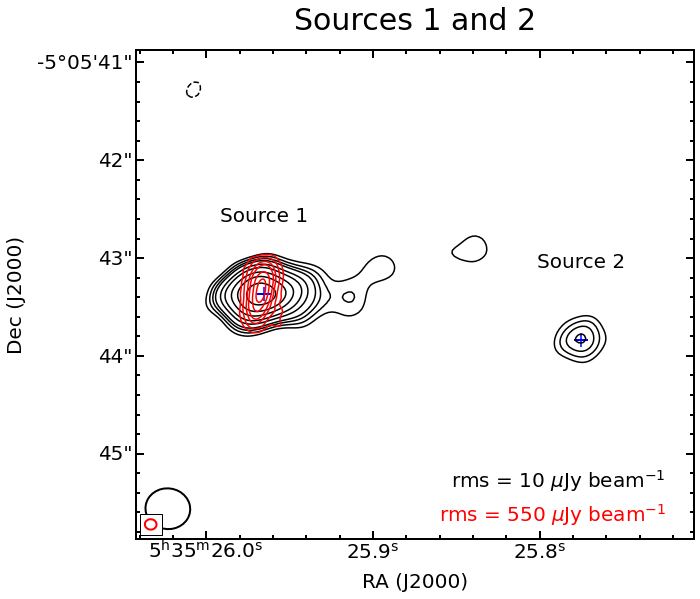

In [ ]:
# write your code

## Exercise 22
What about subplots?

Make a Figure with two vertical axes (top and bottom). Plot VLA image in the top axes and the ALMA image in the bottom one. 

In [ ]:
fig = plt.figure(figsize=(10, 10))

f1 = aplpy.FITSFigure('VLA.fits', figure=fig, subplot=[0,0.5,1,0.5]) # [xmin, ymin, dx, dy] where xmin and ymin are the position of the bottom left corner of the subplot, 
                                                                     # and dx and dy are the width and height of the subplot respectively.
                                                                     # These should all be given in units of the figure width and height.
f1.show_grayscale()
f1.add_colorbar()

f2 = aplpy.FITSFigure('ALMA.fits', figure=fig, subplot=[0,0,1,0.5])
f2.show_grayscale()
f2.add_colorbar()

fig.canvas.draw()


## Exercise 23 (work in groups ~5 mins)
Get sizes right! And allow space to show the coordinates in both figures.

In [1]:
# write your code

## Exercise 24 (work in groups ~15 mins)
Reproduce the following figure. Use images VLA-small.fits and ALMA.fits for the top pannel, source9-VLA.fits and source9-ALMA.fits for the bottom left pannel, and source11-VLA.fits and source11-ALMA.fits for the bottom right pannel.
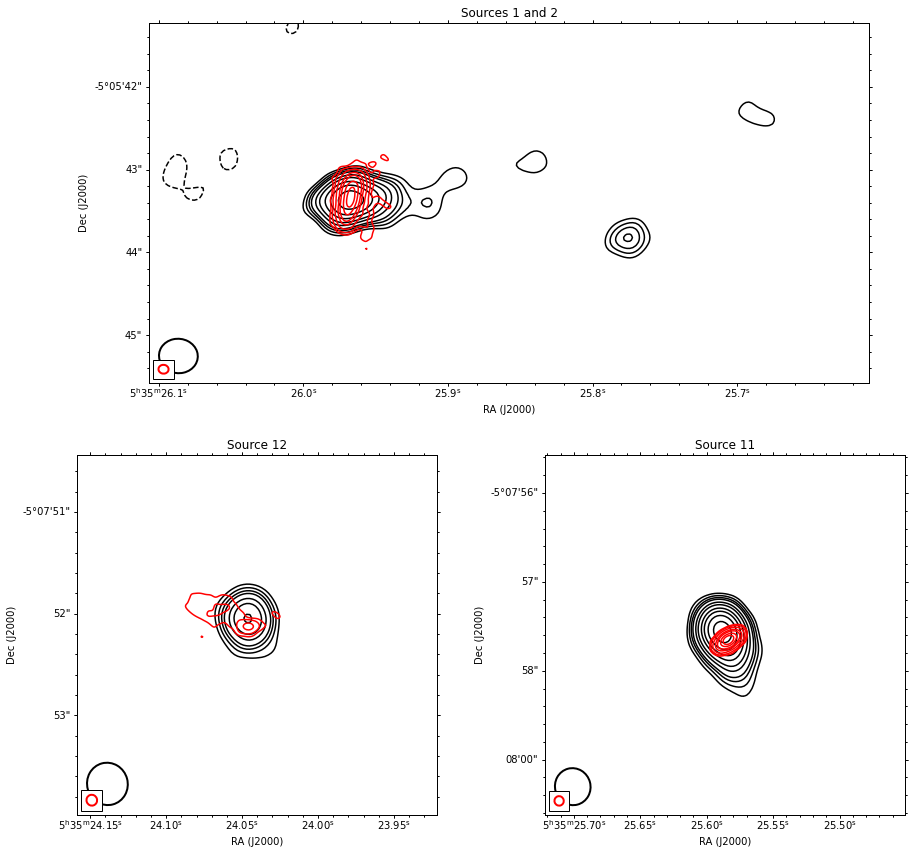




In [ ]:
# write your code